In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
%config IPCompleter.greedy=True
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
# sns.set_style("whitegrid")
# sns.set(rc={'figure.figsize': (12, 6)})

In [2]:
df = pd.read_csv("../files/telecom_churn.csv")

In [3]:
df.drop(["State", "Voice mail plan"], axis=1, inplace=True)

In [4]:
df["International plan"] = df["International plan"].map({"Yes": 1, "No": 0})

In [5]:
df.head()

,Account length,Area code,International plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
y = df["Churn"].astype("int")
X = df.drop(["Churn"], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [8]:
clf_tree = DecisionTreeClassifier(random_state=17)

In [10]:
X_train

,Account length,Area code,International plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
1069,22,510,0,0,160.4,108,27.27,218.1,88,18.54,192.9,115,8.68,12.5,4,3.38,1
1582,86,510,0,0,150.5,92,25.59,120.3,95,10.23,271.2,96,12.20,9.0,2,2.43,1
2444,121,415,0,31,263.1,70,44.73,279.3,118,23.74,127.1,143,5.72,9.7,4,2.62,5
3196,124,510,0,0,169.3,108,28.78,178.6,91,15.18,242.3,82,10.90,12.2,3,3.29,1
267,119,408,0,0,138.3,89,23.51,170.5,78,14.49,263.9,98,11.88,13.5,6,3.65,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,21,415,0,0,146.0,78,24.82,109.7,79,9.32,247.4,108,11.13,6.8,7,1.84,0
1414,182,415,0,0,176.1,90,29.94,174.9,106,14.87,234.7,134,10.56,9.7,4,2.62,1
2191,113,415,0,0,90.6,130,15.40,170.6,100,14.50,137.4,74,6.18,5.4,9,1.46,1
3313,127,408,0,0,102.8,128,17.48,143.7,95,12.21,191.4,97,8.61,10.0,5,2.70,1


In [10]:
np.mean(cross_val_score(clf_tree, X_train, y_train, cv=5))

0.9138423504976518

In [11]:
clf_knn = KNeighborsClassifier()

In [12]:
np.mean(cross_val_score(clf_knn, X_train, y_train, cv=5))

0.8671274043984523

In [13]:
tree_params = {"max_depth": np.arange(1, 11), "max_features": [0.5, 0.7, 1]}
knn_params = {"n_neighbors": range(4, 21, 2) }# + list(range(50, 101, 10))}

In [14]:
tree_grid = GridSearchCV(clf_tree, tree_params, cv=5, n_jobs=-1)
knn_grid = GridSearchCV(clf_knn, knn_params, cv=5, n_jobs=-1)

In [15]:
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1]})

In [16]:
tree_grid.best_score_, tree_grid.best_params_

(0.9391366681677404, {'max_depth': 6, 'max_features': 0.7})

In [17]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(4, 21, 2)})

In [18]:
knn_grid.best_score_, knn_grid.best_params_

(0.8701289391697531, {'n_neighbors': 10})

In [19]:
tree_pred = tree_grid.predict(X_test)

In [20]:
tree_grid.score(X_test, y_test)

0.936

In [21]:
accuracy_score(y_test, tree_pred)

0.936

In [22]:
result = confusion_matrix(y_test, tree_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, tree_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,tree_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[858   9]
 [ 55  78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       867
           1       0.90      0.59      0.71       133

    accuracy                           0.94      1000
   macro avg       0.92      0.79      0.84      1000
weighted avg       0.93      0.94      0.93      1000

Accuracy: 0.936


In [23]:
1 - np.mean(y)

0.8550855085508551

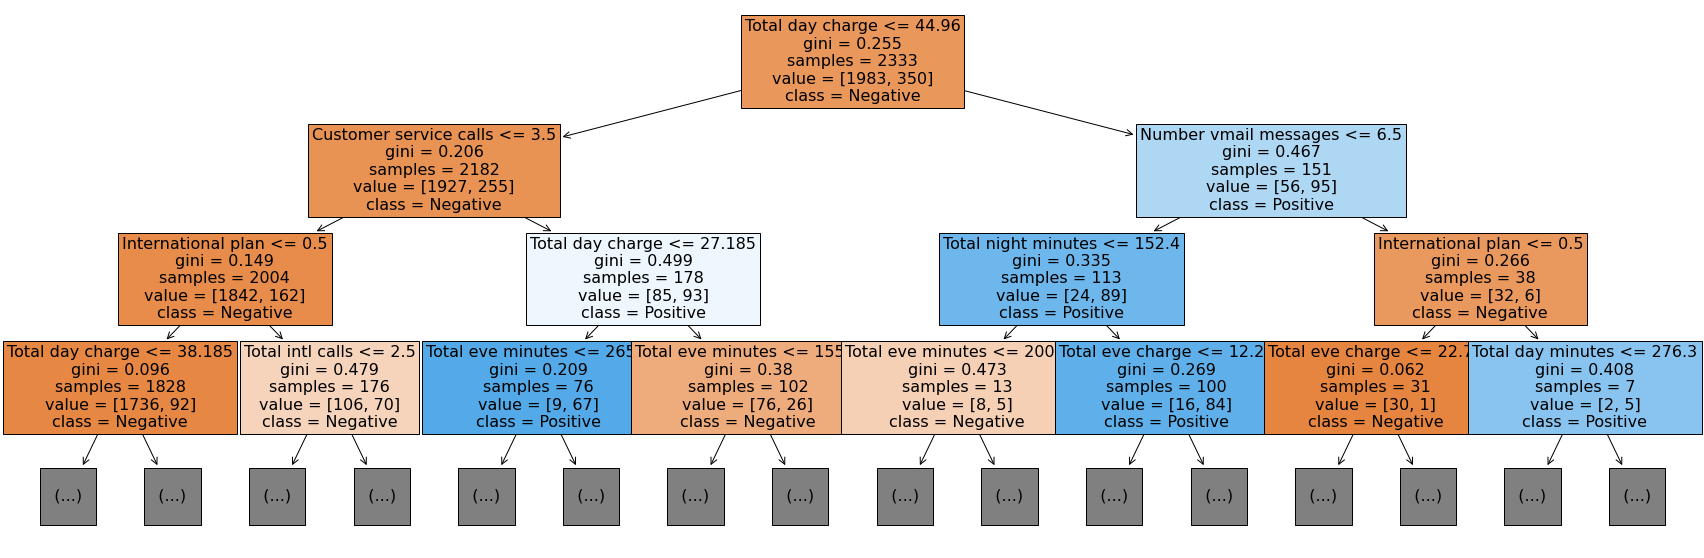

In [24]:
plt.figure(figsize=(30, 10))
tree.plot_tree(tree_grid.best_estimator_, fontsize=16, feature_names=list(X), filled=True,
                class_names=['Negative', 'Positive'], max_depth=3);
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (18,8), dpi=300)
# tree.plot_tree(tree_grid.best_estimator_, feature_names=list(X),
#                class_names=['Negative', 'Positive'],
#                filled=True, max_depth=3,fontsize=8);

In [25]:
######################################## HOMEWORK #########################################################

In [26]:
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis = 1)
    out.drop(feature_list, axis = 1, inplace = True)
    return out
def intersect_features(train, test):
    common_feat = list( set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]
features = ['Внешность', 'Алкоголь_в_напитке',
            'Уровень_красноречия', 'Потраченные_деньги']

In [27]:
df_train = {}
df_train['Внешность'] = ['приятная', 'приятная', 'приятная', 'отталкивающая',
                         'отталкивающая', 'отталкивающая', 'приятная'] 
df_train['Алкоголь_в_напитке'] = ['да', 'да', 'нет', 'нет', 'да', 'да', 'да']
df_train['Уровень_красноречия'] = ['высокий', 'низкий', 'средний', 'средний', 'низкий',
                                   'высокий', 'средний']
df_train['Потраченные_деньги'] = ['много', 'мало', 'много', 'мало', 'много',
                                  'много', 'много']
df_train['Поедет'] = LabelEncoder().fit_transform(['+', '-', '+', '-', '-', '+', '+'])

df_train = create_df(df_train, features)
df_train

,Поедет,Внешность_отталкивающая,Внешность_приятная,Алкоголь_в_напитке_да,Алкоголь_в_напитке_нет,Уровень_красноречия_высокий,Уровень_красноречия_низкий,Уровень_красноречия_средний,Потраченные_деньги_мало,Потраченные_деньги_много
0,0,0,1,1,0,1,0,0,0,1
1,1,0,1,1,0,0,1,0,1,0
2,0,0,1,0,1,0,0,1,0,1
3,1,1,0,0,1,0,0,1,1,0
4,1,1,0,1,0,0,1,0,0,1
5,0,1,0,1,0,1,0,0,0,1
6,0,0,1,1,0,0,0,1,0,1


In [28]:
df_test = {}
df_test['Внешность'] = ['приятная', 'приятная', 'отталкивающая'] 
df_test['Алкоголь_в_напитке'] = ['нет', 'да', 'да']
df_test['Уровень_красноречия'] = ['средний', 'высокий', 'средний']
df_test['Потраченные_деньги'] = ['много', 'мало', 'много']
df_test = create_df(df_test, features)
df_test

,Внешность_отталкивающая,Внешность_приятная,Алкоголь_в_напитке_да,Алкоголь_в_напитке_нет,Уровень_красноречия_высокий,Уровень_красноречия_средний,Потраченные_деньги_мало,Потраченные_деньги_много
0,0,1,0,1,0,1,0,1
1,0,1,1,0,1,0,1,0
2,1,0,1,0,0,1,0,1


In [29]:
y = df_train['Поедет']
df_train, df_test = intersect_features(train=df_train, test=df_test)
df_train

,Алкоголь_в_напитке_нет,Алкоголь_в_напитке_да,Внешность_приятная,Уровень_красноречия_высокий,Потраченные_деньги_много,Внешность_отталкивающая,Уровень_красноречия_средний,Потраченные_деньги_мало
0,0,1,1,1,1,0,0,0
1,0,1,1,0,0,0,0,1
2,1,0,1,0,1,0,1,0
3,1,0,0,0,0,1,1,1
4,0,1,0,0,1,1,0,0
5,0,1,0,1,1,1,0,0
6,0,1,1,0,1,0,1,0


In [30]:
y

0    0
1    1
2    0
3    1
4    1
5    0
6    0
Name: Поедет, dtype: int64

In [31]:
clf = DecisionTreeClassifier(criterion="entropy")

In [32]:
clf.fit(df_train, y)

DecisionTreeClassifier(criterion='entropy')

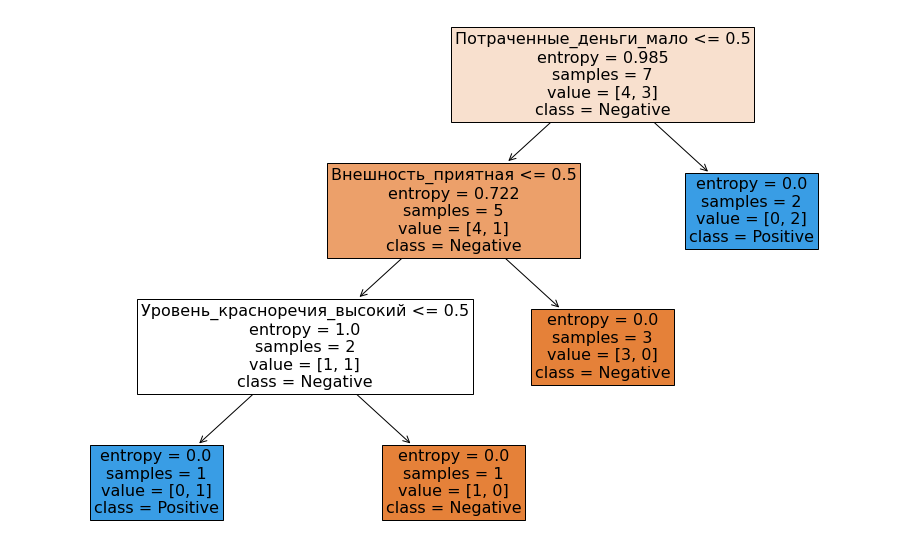

In [33]:
plt.figure(figsize=(16, 10))
tree.plot_tree(clf, fontsize=16, feature_names=list(df_train), filled=True, max_depth=3,
              class_names=['Negative', 'Positive']);

In [34]:
def entropy(a_list):
    c = 0
    b = list(set(a_list))
    for i in b:
        v = a_list.count(i)/len(a_list)
        e = -(v) * np.log2(v)
        c += e
    return c        
        

In [35]:
balls = [1 for i in range(9)] + [0 for i in range(11)]
balls_left  = [1 for i in range(8)] + [0 for i in range(5)] # 8 синих и 5 желтых
balls_right = [1 for i in range(1)] + [0 for i in range(6)] # 1 синий и 6 желтых

In [36]:
entropy(balls_left)

0.9612366047228759

In [37]:
entropy([1, 2, 3, 4, 5, 6])

2.584962500721156

In [38]:
# enropy left - 0.8 right - 0.9

In [39]:
def information_gain(root, left, right):
    ig = entropy(root) - ((len(left)/len(root) * entropy(left)) + (len(right)/len(root) * entropy(right)))
    return ig              

In [40]:
information_gain([0,0,0,0,1,1,1], [0,0,0,1], [0,1,1])

0.12808527889139443

In [41]:
information_gain(balls, balls_left, balls_right)

0.16088518841412436

In [42]:
####################################### 2 chapter ########################################################

In [43]:
data_train = pd.read_csv("https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/adult_train.csv",
                        sep=";");

In [44]:
data_train.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [45]:
data_test = pd.read_csv("https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/adult_test.csv",
                       sep=";")

In [46]:
data_test = data_test.drop(0, axis=0)

In [47]:
# необходимо убрать строки с неправильными метками в тестовой выборке
data_test = data_test[(data_test['Target'] == ' >50K.') 
                      | (data_test['Target']==' <=50K.')]

# перекодируем target в числовое поле
data_train.at[data_train['Target'] == ' <=50K', 'Target'] = 0
data_train.at[data_train['Target'] == ' >50K', 'Target'] = 1

data_test.at[data_test['Target'] == ' <=50K.', 'Target'] = 0
data_test.at[data_test['Target'] == ' >50K.', 'Target'] = 1
data_test['Age'] = data_test['Age'].astype(int)
data_test['fnlwgt'] = data_test['fnlwgt'].astype(int)
data_test['Education_Num'] = data_test['Education_Num'].astype(int)
data_test['Capital_Gain'] = data_test['Capital_Gain'].astype(int)
data_test['Capital_Loss'] = data_test['Capital_Loss'].astype(int)
data_test['Hours_per_week'] = data_test['Hours_per_week'].astype(int)
categorical_columns_train = [c for c in data_train.columns 
                             if data_train[c].dtype.name == 'object']
numerical_columns_train = [c for c in data_train.columns 
                           if data_train[c].dtype.name != 'object']

categorical_columns_test = [c for c in data_test.columns 
                            if data_test[c].dtype.name == 'object']
numerical_columns_test = [c for c in data_test.columns 
                          if data_test[c].dtype.name != 'object']
for c in categorical_columns_train:
    data_train[c] = data_train[c].fillna(data_train[c].mode())
for c in categorical_columns_test:
    data_test[c] = data_test[c].fillna(data_train[c].mode())
    
for c in numerical_columns_train:
    data_train[c] = data_train[c].fillna(data_train[c].median())
for c in numerical_columns_test:
    data_test[c] = data_test[c].fillna(data_train[c].median())  
data_train = pd.concat([data_train, pd.get_dummies(data_train['Workclass'], 
                                                   prefix="Workclass"),
                      pd.get_dummies(data_train['Education'], prefix="Education"),
                      pd.get_dummies(data_train['Martial_Status'], prefix="Martial_Status"),
                      pd.get_dummies(data_train['Occupation'], prefix="Occupation"),
                      pd.get_dummies(data_train['Relationship'], prefix="Relationship"),
                      pd.get_dummies(data_train['Race'], prefix="Race"),
                      pd.get_dummies(data_train['Sex'], prefix="Sex"),
                      pd.get_dummies(data_train['Country'], prefix="Country")],
                     axis=1)

data_test = pd.concat([data_test, pd.get_dummies(data_test['Workclass'], prefix="Workclass"),
                      pd.get_dummies(data_test['Education'], prefix="Education"),
                      pd.get_dummies(data_test['Martial_Status'], prefix="Martial_Status"),
                      pd.get_dummies(data_test['Occupation'], prefix="Occupation"),
                      pd.get_dummies(data_test['Relationship'], prefix="Relationship"),
                      pd.get_dummies(data_test['Race'], prefix="Race"),
                      pd.get_dummies(data_test['Sex'], prefix="Sex"),
                      pd.get_dummies(data_test['Country'], prefix="Country")],
                     axis=1)
data_train.drop(['Workclass', 'Education', 'Martial_Status',
                 'Occupation', 'Relationship', 'Race', 'Sex', 'Country'],
                axis=1, inplace=True)
data_test.drop(['Workclass', 'Education', 'Martial_Status', 'Occupation', 
                'Relationship', 'Race', 'Sex', 'Country'],
               axis=1, inplace=True)
data_test['Country_ Holand-Netherlands'] = np.zeros([data_test.shape[0], 1])
X_train=data_train.drop(['Target'], axis=1)
y_train = data_train['Target']

X_test=data_test.drop(['Target'], axis=1)
y_test = data_test['Target']


In [48]:
clf = DecisionTreeClassifier(max_depth=3, random_state=17)

In [49]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

In [50]:
y_pred = clf.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred)

0.8447884036607088

In [52]:
clf = DecisionTreeClassifier(random_state=17)
tree_params = {'max_depth': range(2,11)}

locally_best_tree = GridSearchCV(clf, tree_params, cv=5)                   

locally_best_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': range(2, 11)})

In [53]:
print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)

Best params: {'max_depth': 9}
Best cross validaton score 0.8562698879315647


In [54]:
y_pred = locally_best_tree.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)

0.8471838339168356

In [56]:
rf = RandomForestClassifier(n_estimators=100, random_state=17)

In [57]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

In [58]:
y_pred = rf.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred)

0.8576254529820035

In [60]:
# rf = RandomForestClassifier(random_state=17)
# forest_params = {'max_depth': range(10, 21),
#                 'max_features': range(5, 105, 10)}

# locally_best_forest = GridSearchCV(rf, forest_params, cv=5, n_jobs=-1)

# locally_best_forest.fit(X_train, y_train)

In [61]:
# print("Best params:", locally_best_forest.best_params_)
# print("Best cross validaton score", locally_best_forest.best_score_)

In [62]:
# tuned_forest_predictions = locally_best_forest.predict(X_test)
# accuracy_score(y_test, tuned_forest_predictions)